In [49]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from datetime import datetime

In [50]:
#Load file of petrol prices
file = 'data/Pompprijzen2006-heden.csv'
pompprijzen = pd.read_csv(file, delimiter = ';')

In [51]:
#to fix the date strings in the file for better graph
now = '20220823'
datetime_object = datetime.strptime(now, '%Y%m%d')
now_better = datetime_object.strftime('%d/%m/%Y')
print(now_better)

23/08/2022


In [52]:
#process data to get our chosen timeline, convert our date and set index to date
pompprijzen_timeline = pompprijzen[
    pompprijzen.Perioden > 20200229 
]
for i in range(940):
    date_format = datetime.strptime(pompprijzen_timeline.Perioden[i], '%Y%m%d')         #ik denk dat dit niet werkt omdat het getal in de file geen string is maar een integer
    pompprijzen_timeline.Perioden[i] = date_format.strftime('%d/%m/%Y')


pompprijzen_timeline.set_index('Perioden', inplace = True)


KeyError: 0

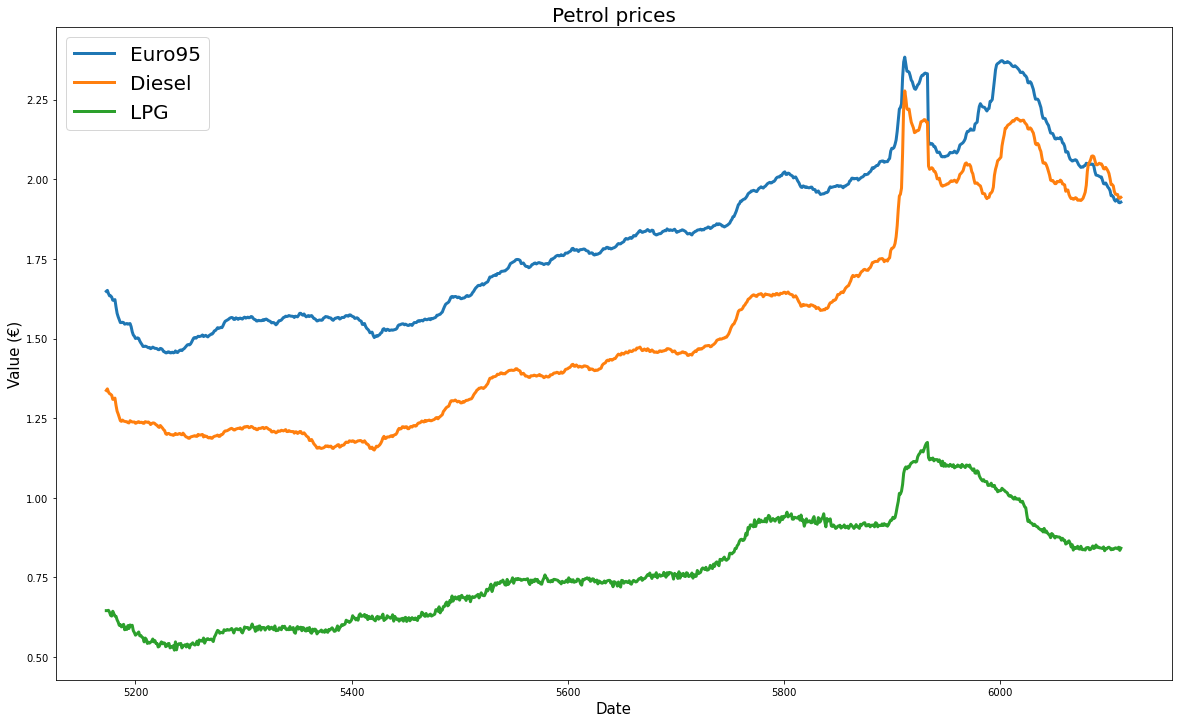

In [ ]:
#plot graph of prices through chosen timeline
a = [pompprijzen_timeline.BenzineEuro95_1 , pompprijzen_timeline.Diesel_2, pompprijzen_timeline.Lpg_3]
plt.figure(figsize=(20,12))
for i in range(len(a)):
    plt.plot(pompprijzen_timeline.ID, a[i], linewidth = 3)     #moet nog pompprijzen_timeline.Perioden worden, wanneer de date in goede format staat
plt.title('Petrol prices', fontsize = 20)
plt.ylabel('Value (€)', fontsize = 15)
plt.xlabel('Date', fontsize = 15)
plt.legend(('Euro95', 'Diesel', 'LPG'), loc = 'upper left', fontsize = 20)

In [ ]:
print('The maximum price for Euro95 is:', pompprijzen_timeline.BenzineEuro95_1.max()   , ', this price occurred at:', pompprijzen_timeline.BenzineEuro95_1.idxmax())
print('The maximum price for Diesel is', pompprijzen_timeline.Diesel_2.max()    , 'this price occurred at:', pompprijzen_timeline.Diesel_2.idxmax())
print('The maximum price for LPG is', pompprijzen_timeline.Lpg_3.max()    , 'this price occurred at:', pompprijzen_timeline.Lpg_3.idxmax())

The maximum price for Euro95 is: 2.383 , this price occurred at: 20220310
The maximum price for Diesel is 2.277 this price occurred at: 20220310
The maximum price for LPG is 1.174 this price occurred at: 20220331
